In [55]:
import numpy
import random
import math
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from matplotlib import pyplot



In [56]:
def grad(x, y, w):                                  #逻辑回归
    gradient = x * (y - x.dot(w.T))                 #求梯度   与线性回归一样   
    return gradient

def compute_loss(x, y, w, i):
    loss = 0                                        #SGD的loss函数                                
    for m in range(len(i)):
        loss += 0.5 * ((y[i[m]] - x[i[m],:].dot(w.T)) ** 2)
    return loss/len(i)

In [57]:
def NAG(x, y, x_test, y_test, w, C, r, gamma, threshold, count):
    vt = numpy.zeros(w.shape)
    loss_history = []
    test_loss_history = []
    random_index = []
    random_test_index = []
    for i in range(count):
        random_num = random.randint(0, x.shape[0]-1)
        random_test_num = random.randint(0, x_test.shape[0]-1)
        random_index.append(random_num)
        random_test_index.append(random_test_num)
    for i in range(count):
        gradient = grad(x[random_index[i],:], y[random_index[i]], w-gamma*vt)
        vt = gamma*vt - r*gradient
        w -= vt
        loss = compute_loss(x, y, w, random_index)
        loss_history.append(loss)
        test_loss_history.append(compute_loss(x_test, y_test, w, random_test_index))
        if loss < threshold :
            break 
    return w, loss_history, test_loss_history

def RMSProp(x, y, x_test, y_test, w, C, r, gamma, threshold, count):
    Gt = 0
    loss_history = []
    test_loss_history = []
    random_index = []
    random_test_index = []
    for i in range(count):
        random_num = random.randint(0, x.shape[0]-1)
        random_test_num = random.randint(0, x_test.shape[0]-1)
        random_index.append(random_num)
        random_test_index.append(random_test_num)
    for i in range(count):
        gradient = grad(x[random_index[i],:], y[random_index[i]], w)
        Gt = gamma*Gt + (1-gamma)*gradient.dot(gradient.T)
        w += r * gradient / math.sqrt(Gt+1e-8)
        loss = compute_loss(x, y, w, random_index)
        loss_history.append(loss)
        test_loss_history.append(compute_loss(x_test, y_test, w, random_test_index))
        if loss < threshold :
            break 
    return w, loss_history, test_loss_history

def AdaDelta(x, y, x_test, y_test, w, C, r, gamma, threshold, count):
    Gt = 0
    variable_t = 0
    loss_history = []
    test_loss_history = []
    random_index = []
    random_test_index = []
    for i in range(count):
        random_num = random.randint(0, x.shape[0]-1)
        random_test_num = random.randint(0, x_test.shape[0]-1)
        random_index.append(random_num)
        random_test_index.append(random_test_num)
for i in range(count):
        gradient = grad(x[random_index[i],:], y[random_index[i]], w)
        Gt = gamma*Gt + (1-gamma)*gradient.dot(gradient.T)
        variable_w = - math.sqrt(variable_t + 1e-8) * gradient / math.sqrt(Gt + 1e-8)
        w -= variable_w
        variable_t = gamma*variable_t + (1-gamma)*variable_w.dot(variable_w.T)
        loss = compute_loss(x, y, w, random_index)
        loss_history.append(loss)
        test_loss_history.append(compute_loss(x_test, y_test, w, random_test_index))
        if loss < threshold :
            break 
    return w, loss_history, test_loss_history

def Adam(x, y, x_test, y_test, w, C, r, gamma, threshold, count):
    Gt = 0
    moment = numpy.zeros((1, x.shape[1]))
    B = 0.9
    loss_history = []
    test_loss_history = []
    random_index = []
    random_test_index = []
    for i in range(count):
        random_num = random.randint(0, x.shape[0]-1)
        random_test_num = random.randint(0, x_test.shape[0]-1)
        random_index.append(random_num)
        random_test_index.append(random_test_num)
    for i in range(count):
        gradient = grad(x[random_index[i],:], y[random_index[i]], w)
        moment = B*moment + (1-B)*gradient
        Gt = gamma*Gt + (1-gamma)*gradient.dot(gradient.T)
        a = r * math.sqrt(1 - pow(gamma, count)) / (1-pow(B, count))
        w += a * moment / math.sqrt(Gt + 1e-8)
        loss = compute_loss(x, y, w, random_index)
        loss_history.append(loss)
        test_loss_history.append(compute_loss(x_test, y_test, w, random_test_index))
        if loss < threshold :
            break 
    return w, loss_history, test_loss_history

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 68)

In [58]:
x, y_train = load_svmlight_file("a9a.txt")
x, y_test = load_svmlight_file("a9a_test.txt")

X_train = numpy.hstack([x_train, numpy.ones((x_train.shape[0], 1))])    #X_train加一列1
print(X_train.shape)
X_test = numpy.hstack([x_test, numpy.zeros((x_test.shape[0], 1))])
X_test = numpy.hstack([X_test, numpy.ones((x_test.shape[0], 1))])       #X_test加一列0 和1
print(X_test.shape)


(32561, 124)
(16281, 124)


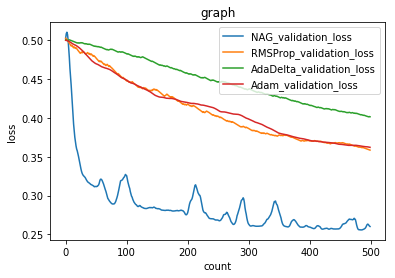

In [60]:
count = 500

NAG_w = numpy.zeros((1, X_train.shape[1]))                    #初始化为0
NAG_w, NAG_loss_history, NAG_test_loss_history = NAG(X_train, y_train, X_test, y_test, NAG_w, 0.3, 0.001, 0.9, 0.001, count)

RMS_w = numpy.zeros((1, X_train.shape[1]))                    #初始化为0
RMS_w, RMS_loss_history, RMS_test_loss_history = RMSProp(X_train, y_train, X_test, y_test, RMS_w, 0.3, 0.001, 0.9, 0.001, count)

AdaDelta_w = numpy.zeros((1, X_train.shape[1]))                #初始化为0
AdaDelta_w, AdaDelta_loss_history, AdaDelta_test_loss_history = AdaDelta(X_train, y_train, X_test, y_test, AdaDelta_w, 0.3, 0.001, 0.9, 0.001, count)

Adam_w = numpy.zeros((1, X_train.shape[1]))                      #初始化为0
Adam_w, Adam_loss_history, Adam_test_loss_history = Adam(X_train, y_train, X_test, y_test, Adam_w, 0.3, 0.001, 0.9, 0.001, count)


pyplot.plot(NAG_test_loss_history, label = 'NAG_validation_loss')
pyplot.plot(RMS_test_loss_history, label = 'RMSProp_validation_loss')
pyplot.plot(AdaDelta_test_loss_history, label = 'AdaDelta_validation_loss')
pyplot.plot(Adam_test_loss_history, label = 'Adam_validation_loss')
pyplot.legend(loc='upper right')
pyplot.ylabel('loss')
pyplot.xlabel('count')
pyplot.title('graph')
pyplot.show()